# Configuration
A sample of the best configuration for the job

In [11]:
import matplotlib.pyplot as plt

import gym_duckietown
import gym

from IPython import display as ipythondisplay

In [12]:
#gym_duckitown is very chatty
import logging
gym_duckietown.logger.setLevel(logging.WARNING)

In [13]:
env = gym.make("Duckietown-small_loop-v0",
    full_transparency=True,
    accept_start_angle_deg=0.1, #0 not available, see line 727 (< instead of <= !!)
    domain_rand=False,
    user_tile_start=[1,2],
    seed=42,
    max_steps=2000,
)

In [14]:
env.start_pose = [0.6110239807981087, 0.0, 1.527379317017364]

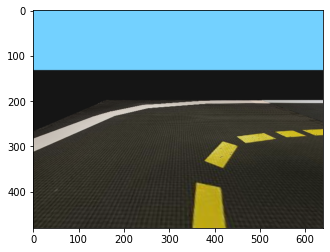

In [15]:
plt.imshow(env.reset())

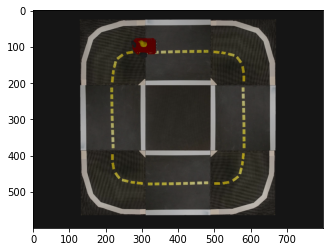

In [16]:
plt.imshow(env.render(mode="top_down"))

In [17]:
env.get_agent_info()

{'Simulator': {'action': [0, 0],
  'lane_position': {'dist': -0.14044014882317635,
   'dot_dir': 0.9999989660890564,
   'angle_deg': 0.08239089750683806,
   'angle_rad': 0.0014379924351675115},
  'robot_speed': 0.0,
  'proximity_penalty': 0,
  'cur_pos': [0.5936349997673466, 0.0, 1.4859401488231763],
  'cur_angle': 3.140154661154651,
  'wheel_velocities': [0, 0],
  'timestamp': 0.0,
  'tile_coords': [1, 2]}}

### Cartesian dimensions

In [18]:
f"From (0,0) to {(env.grid_height*env.road_tile_size, env.grid_width*env.road_tile_size)}"

'From (0,0) to (1.755, 1.755)'

In [19]:
#From line 1586 circa
p = env.cartesian_from_weird(env.cur_pos, env.cur_angle)
p

array([[-0.99999897, -0.00143799,  0.593635  ],
       [ 0.00143799, -0.99999897,  0.26905985],
       [ 0.        ,  0.        ,  1.        ]])

## Test drive

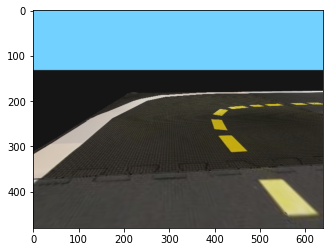

In [20]:
env.reset()
for i in range(10):

    lane_pose = env.get_lane_pos2(env.cur_pos, env.cur_angle)
    distance_to_road_center = lane_pose.dist
    angle_from_straight_in_rads = lane_pose.angle_rad
    
    k_p = 10
    k_d = 1
    speed = 0.5 
    steering = k_p*distance_to_road_center + k_d*angle_from_straight_in_rads
    
    obs, reward, done, info = env.step([speed, steering])
    plt.imshow(obs)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        break
ipythondisplay.clear_output(wait=True)